In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

# import progressbar as pb

# from DeepRL.pong_atari.parallel_env import parallelEnv
# from DeepRL.pong_atari.agent import Agent
import numpy as np
from DeepRL.pong_atari import utils
from DeepRL.pong_atari.main import Reinforce

import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
import gym
import time

# PongDeterministic does not contain random frameskip
# so is faster to train than the vanilla Pong-v4 environment
env = gym.make('PongDeterministic-v4')

print("List of available actions: ", env.unwrapped.get_action_meanings())

List of available actions:  ['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']


## Preprocessing:
------

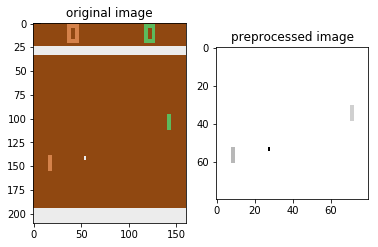

In [3]:
import matplotlib
import matplotlib.pyplot as plt

# show what a preprocessed image looks like
env.reset()
_, _, _, _ = env.step(0)
# get a frame after 20 steps
for _ in range(20):
    frame, _, _, _ = env.step(1)

plt.subplot(1,2,1)
plt.imshow(frame)
plt.title('original image')

plt.subplot(1,2,2)
plt.title('preprocessed image')

# 80 x 80 black and white image
plt.imshow(utils.preprocess_single(frame), cmap='Greys')
plt.show()


## Model 1:
-----------

In [ ]:
class Config:
    LEARNING_RATE = 0.0001
    DISCOUNT = 0.99
    BETA = 0.01
    BETA_DECAY = 0.995

    # To perform Proximal policy Optimization
    CLIP_SURROGATE = True
    EPSILON_CLIP = 0.1
    EPSILON_CLIP_DECAY = 0.999
    TRAJECTORY_INNER_LOOP_CNT = 4
    
    # Setup
    NET_NAME = 'net1'
    NUM_EPISODES = 500
    HORIZON = 320          # Number of state-action samples in a trajectory
    NUM_PARALLEL_ENV = 8   # Number of environments for parallel trajectory sampling

    # USE PATH
    MODEL_NAME = 'model_1'
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/play_pong/%s/checkpoints'%str(MODEL_NAME)
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/play_pong/%s/checkpoints/stats.json'%str(MODEL_NAME)
    
    if not os.path.exists(CHECKPOINT_PATH):
        os.makedirs(CHECKPOINT_PATH)


avg_rewards = Reinforce(Config).train()

[Model] Initializing net 1


Episode: 20, score: -13.875000
[-16. -15. -15. -13. -10. -16. -10. -16.]


Episode: 40, score: -14.625000
[-16. -15. -16. -16. -10. -16. -15. -13.]


Episode: 60, score: -13.375000
[-12. -14. -10. -14. -16. -12. -16. -13.]


In [4]:
episode = 500
n = 8 # parallel environments
tmax = 320

action = np.where(np.random.rand(n) < action_probs, RIGHTFIRE, LEFTFIRE

Episode: 20, score: -14.500000
[-12. -16. -16. -13. -15. -15. -15. -14.]


Episode: 40, score: -14.125000
[-13. -14. -16. -16. -11. -12. -16. -15.]


Episode: 60, score: -14.125000
[-16. -13. -10. -16. -14. -14. -15. -15.]


Episode: 80, score: -14.500000
[-10. -15. -16. -16. -12. -16. -14. -17.]


Episode: 100, score: -13.250000
[-16. -11. -12. -16. -16. -15. -15.  -5.]


Episode: 120, score: -14.125000
[-13. -14. -15. -14. -11. -16. -14. -16.]


Episode: 140, score: -12.875000
[-15. -10. -15. -10. -16. -16. -11. -10.]


Episode: 160, score: -12.625000
[-13. -11. -15. -11. -13. -15. -11. -12.]


Episode: 180, score: -10.875000
[-11. -10. -11. -10. -12. -13. -10. -10.]


Episode: 200, score: -10.625000
[-11. -12. -13. -11. -11.  -8.  -6. -13.]


Episode: 220, score: -5.375000
[ -7.  -4.  -2.  -4.  -6.  -6. -10.  -4.]


Episode: 240, score: -5.750000
[-10.  -6.  -3.  -6.  -6.  -7.  -2.  -6.]


Episode: 260, score: -1.375000
[-4.  0. -3.  0. -5. -1.  0.  2.]


Episode: 280, score: -1.875000
[-6. -1.  0. -3. -4. -1.  1. -1.]


Episode: 300, score: -0.250000
[-1. -1. -1.  2. -1.  0.  0.  0.]


Episode: 320, score: 0.125000
[ 1.  1. -2.  0.  0. -1. -1.  3.]


Episode: 340, score: 0.625000
[ 3. -2.  3. -2. -2.  3.  1.  1.]


Episode: 360, score: 1.250000
[ 3. -1.  3.  1. -2.  0.  3.  3.]


Episode: 380, score: 1.875000
[ 3.  5.  0.  1.  3. -2.  1.  4.]


Episode: 400, score: 3.500000
[3. 3. 1. 5. 5. 5. 3. 3.]


Episode: 420, score: 4.375000
[5. 5. 3. 4. 5. 5. 3. 5.]


Episode: 440, score: 4.250000
[5. 5. 1. 5. 5. 3. 5. 5.]


Episode: 460, score: 5.000000
[5. 5. 5. 5. 5. 5. 5. 5.]


Episode: 480, score: 4.250000
[ 5.  5.  5.  5.  5.  5.  5. -1.]


Episode: 500, score: 4.500000
[5. 5. 5. 5. 3. 5. 3. 5.]


### Train:
------

In [4]:
episode = 500
n = 8 # parallel environments
tmax = 320

widget = ['training loop: ', pb.Percentage(), ' ', pb.Bar(), ' ', pb.ETA()]
timer = pb.ProgressBar(widgets=widget, maxval=episode).start()

# initialize environment
envs = parallelEnv('PongDeterministic-v4', n, seed=12345)

# keep track of progress
mean_rewards = []

agent = Agent(envs)

for e in range(episode):
#     print('Running Episode .. ', e)
    # collect trajectories
    rewards = agent.learn(n, tmax, e)
    total_rewards = np.sum(rewards, axis=0)
    
    # get the average reward of the parallel environments
    mean_rewards.append(np.mean(total_rewards))
    
    # display some progress every 20 iterations
    if (e + 1) % 20 == 0:
        print("Episode: {0:d}, score: {1:f}".format(e + 1, np.mean(total_rewards)))
        print(total_rewards)
    
    # update progress widget bar
    timer.update(e + 1)

timer.finish()

Episode: 20, score: -16.000000
[-15. -17. -14. -16. -17. -15. -17. -17.]


Episode: 40, score: -14.500000
[-15. -14. -13. -13. -14. -15. -16. -16.]


Episode: 60, score: -15.375000
[-14. -15. -17. -15. -16. -17. -13. -16.]


Episode: 80, score: -15.250000
[-14. -16. -13. -17. -17. -16. -13. -16.]


Episode: 100, score: -15.500000
[-17. -15. -15. -15. -14. -16. -17. -15.]


Episode: 120, score: -14.625000
[-14. -13. -16. -16. -16. -15. -11. -16.]


Episode: 140, score: -15.250000
[-16. -16. -16. -13. -13. -17. -16. -15.]


Episode: 160, score: -15.000000
[-16. -11. -16. -15. -16. -16. -14. -16.]


Episode: 180, score: -15.125000
[-14. -16. -12. -15. -15. -16. -16. -17.]


Episode: 200, score: -14.625000
[-16. -14. -13. -16. -16. -16. -16. -10.]


Episode: 220, score: -14.625000
[-13. -17. -13. -12. -13. -16. -17. -16.]


Episode: 240, score: -14.500000
[-16. -15.  -8. -17. -16. -17. -16. -11.]


Episode: 260, score: -15.750000
[-16. -16. -16. -16. -16. -13. -17. -16.]


Episode: 280, score: -13.875000
[-14. -13. -15. -14. -15. -16. -13. -11.]


Episode: 300, score: -14.625000
[-16. -15. -16. -16. -14. -10. -16. -14.]


Episode: 320, score: -14.750000
[ -9. -16. -16. -16. -16. -13. -16. -16.]


Episode: 340, score: -12.000000
[-10. -14. -10. -13. -13. -12. -10. -14.]


Episode: 360, score: -14.750000
[-15. -16. -12. -15. -16. -14. -16. -14.]


Episode: 380, score: -15.625000
[-16. -15. -16. -16. -14. -16. -16. -16.]


Episode: 400, score: -13.625000
[-15. -15. -10. -14. -13. -11. -15. -16.]


Episode: 420, score: -13.250000
[-15. -12.  -9. -13. -15. -14. -14. -14.]


Episode: 440, score: -13.375000
[-12. -13. -13. -10. -13. -15. -16. -15.]


Episode: 460, score: -12.500000
[-12. -11. -14. -14. -12. -10. -14. -13.]


Episode: 480, score: -12.500000
[-11. -14. -11. -13. -11. -12. -15. -13.]


Episode: 500, score: -12.875000
[-12. -15. -12. -13. -13. -12. -14. -12.]


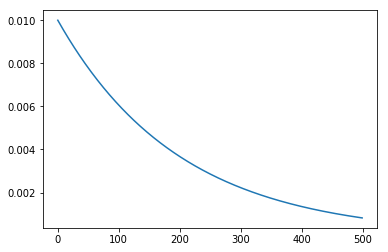

In [7]:
plt.plot(agent.stats_dict['beta'])